In [1]:
from graph_drawer import get_nx_representation, draw_graph
from dataset import PacketsDatapipe, get_labels
import matplotlib.pyplot as plt
import numpy as np

In [2]:
packet_list_dataset_location = r'App\src\build_release\own\packet_list_10_dataset'
size_delay_dataset_location = r'App\src\build_release\own\size_delay_50_dataset'
size_delay_dataset = PacketsDatapipe(size_delay_dataset_location, batch_size=1, balanced=True)[0]
packet_list_dataset = PacketsDatapipe(packet_list_dataset_location, batch_size=1, balanced=True)[0]

0 (idle): 3894
1 (web): 8255
2 (video): 86477
3 (voip): 5257
4 (file-transfer): 13012
5 (online-game): 6984
Balanced to: 3894
0 (idle): 20098
1 (web): 53468
2 (video): 437690
3 (voip): 67848
4 (file-transfer): 68139
5 (online-game): 63544
Balanced to: 20098


# Draw size delay representaion

video
voip
web
idle
online-game
file-transfer


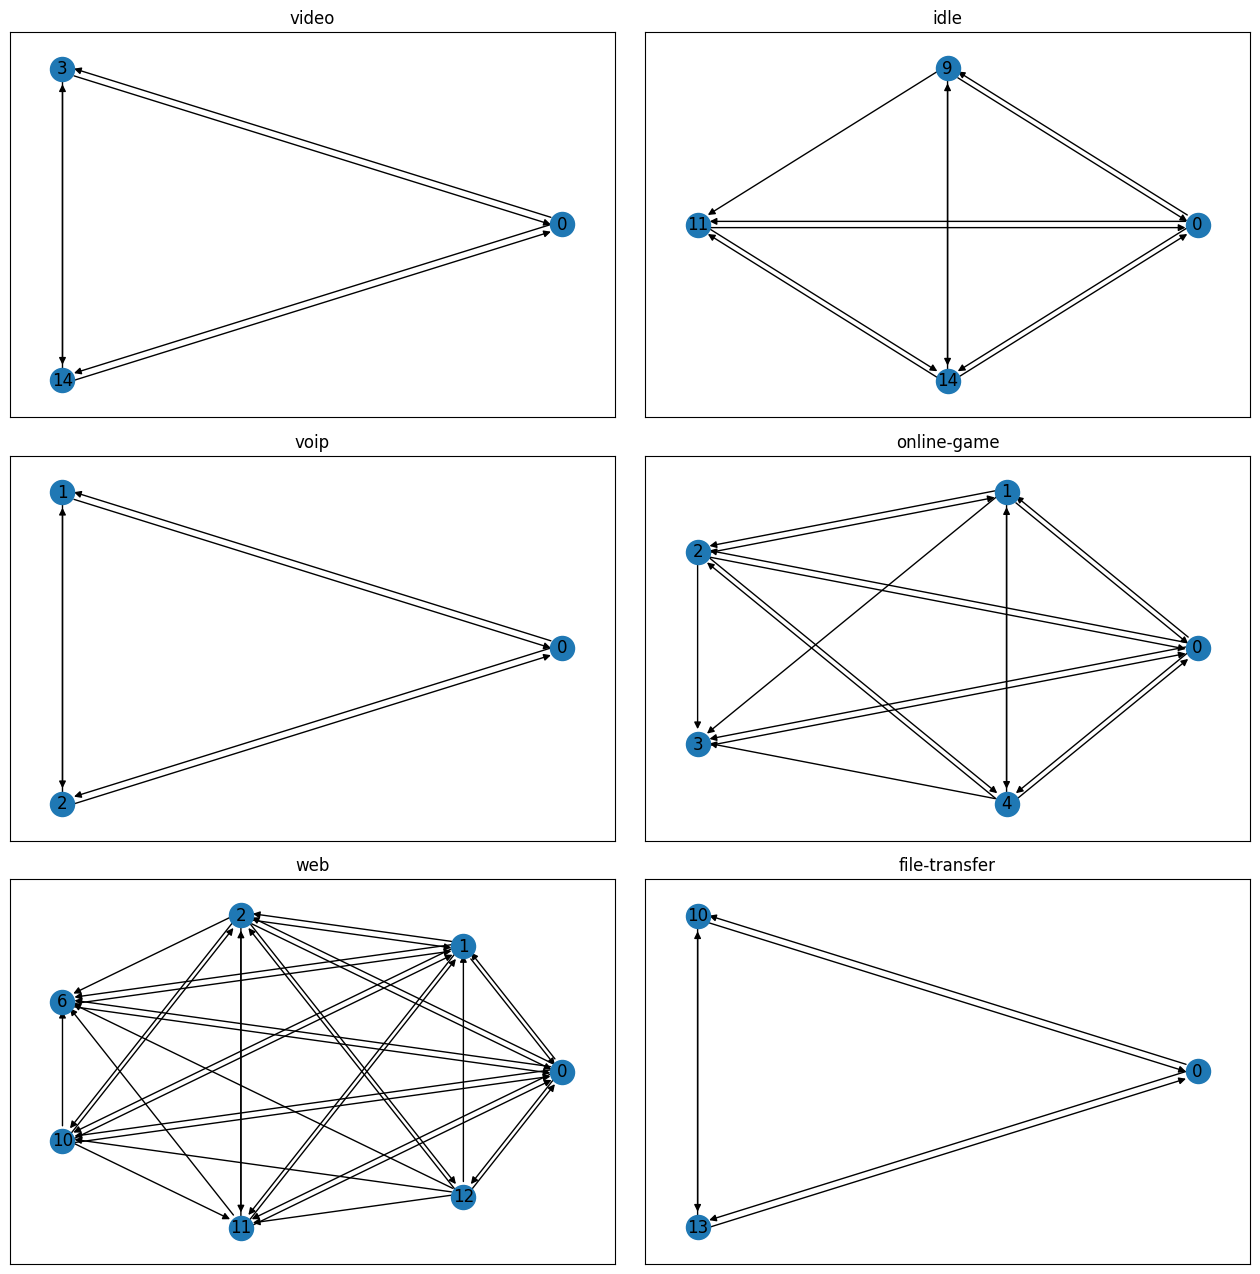

DiGraph with 3 nodes and 6 edges


In [3]:
rows = 2
cols = 3
fig, ax = plt.subplots(cols, rows, figsize=(16,16))
plt.subplots_adjust(hspace=0.1, wspace=0.05)
unique_labels = []
i = 0
while i < rows:
    j = 0
    while j < cols:
        graph = next(iter(size_delay_dataset))
        if graph.x.shape[0] > 2:
            label = graph.y.item()
            if label not in unique_labels:
                unique_labels.append(label)
                label_name = get_labels()[label]
                print(label_name)
                G = get_nx_representation(graph.x, graph.edge_index)
                draw_graph(G, ax[j][i])
                ax[j][i].set_title(label_name)
                j += 1
    i += 1

plt.show()
print(G)

# Draw packet list representaion

Calculating avg graph values...
201/120588
Done
voip
file-transfer
web
idle
video
online-game


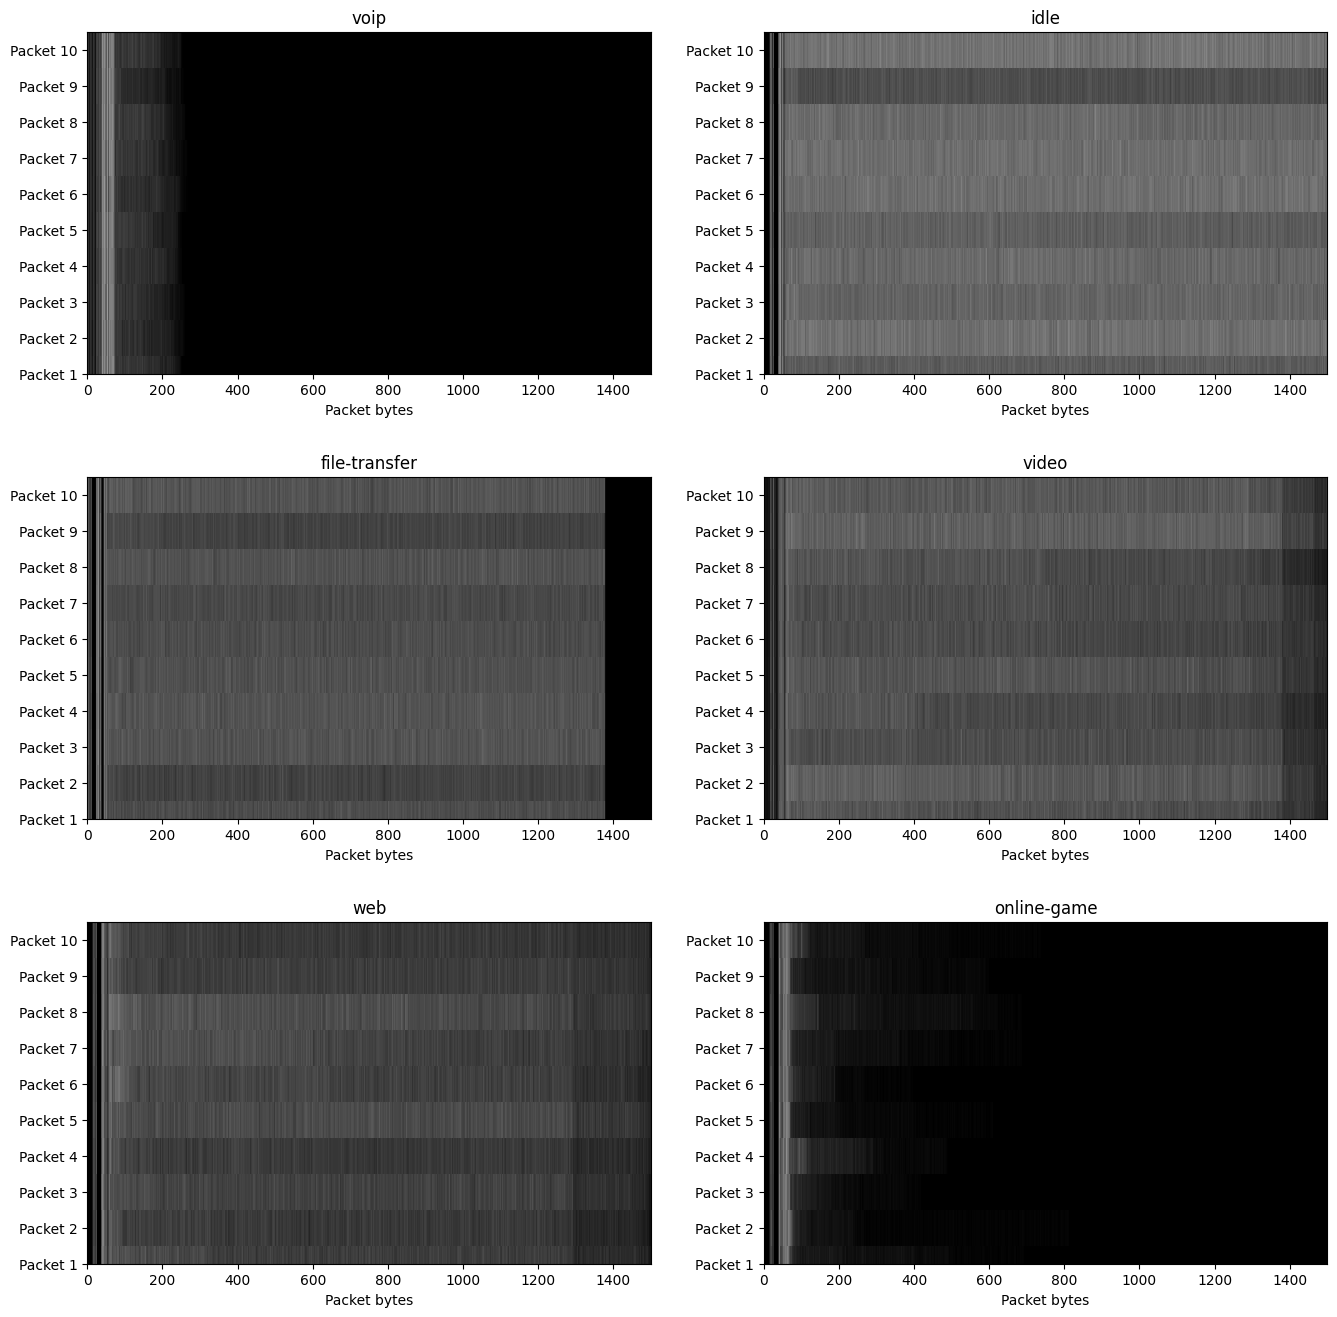

In [27]:

graphs_values = {}

print('Calculating avg graph values...')
for i, graph in enumerate(packet_list_dataset):
    label = graph.y.item()
    if label not in graphs_values:
        graphs_values[label] = [graph.x.numpy(), 1]
    else:
        graphs_values[label][0] += graph.x.numpy()
        graphs_values[label][1] += 1

    print(f'{i}/{len(packet_list_dataset)}', end='\r')
    if (i > 1000):
        break
print('\nDone')


rows = 2
cols = 3
fig, ax = plt.subplots(cols, rows, figsize=(16,16))
plt.subplots_adjust(hspace=0.3)
graphs_values_iter = iter(graphs_values.items())
i = 0
while i < rows:
    j = 0
    while j < cols:
        label, (values, num_values) = next(graphs_values_iter)
        values /= num_values

        label_name = get_labels()[label]
        print(label_name)

        bw_values = (values * 255).astype(int)
        for k in range(bw_values.shape[0]):
            vector = bw_values[k, :]
            
            # Create a colored strip for each vector
            color_strip = np.zeros((1, bw_values.shape[1], 3), dtype=np.uint8)
            color_strip[:, :, 0] = vector
            color_strip[:, :, 1] = vector
            color_strip[:, :, 2] = vector
            
            # Display the colored strip
            ax[j][i].imshow(color_strip, extent=[0, bw_values.shape[1], k, k + 1], aspect='auto')

        # Set y-axis ticks and labels
        ax[j][i].set_yticks(np.arange(0.5, bw_values.shape[0], 1))
        ax[j][i].set_yticklabels([f"Packet {i+1}" for i in range(bw_values.shape[0])])

        # Set x-axis label
        ax[j][i].set_xlabel('Packet bytes')
        ax[j][i].set_title(label_name)
        j += 1
    i += 1


# Show the plot
plt.show()


voip
video
idle
file-transfer
web
online-game


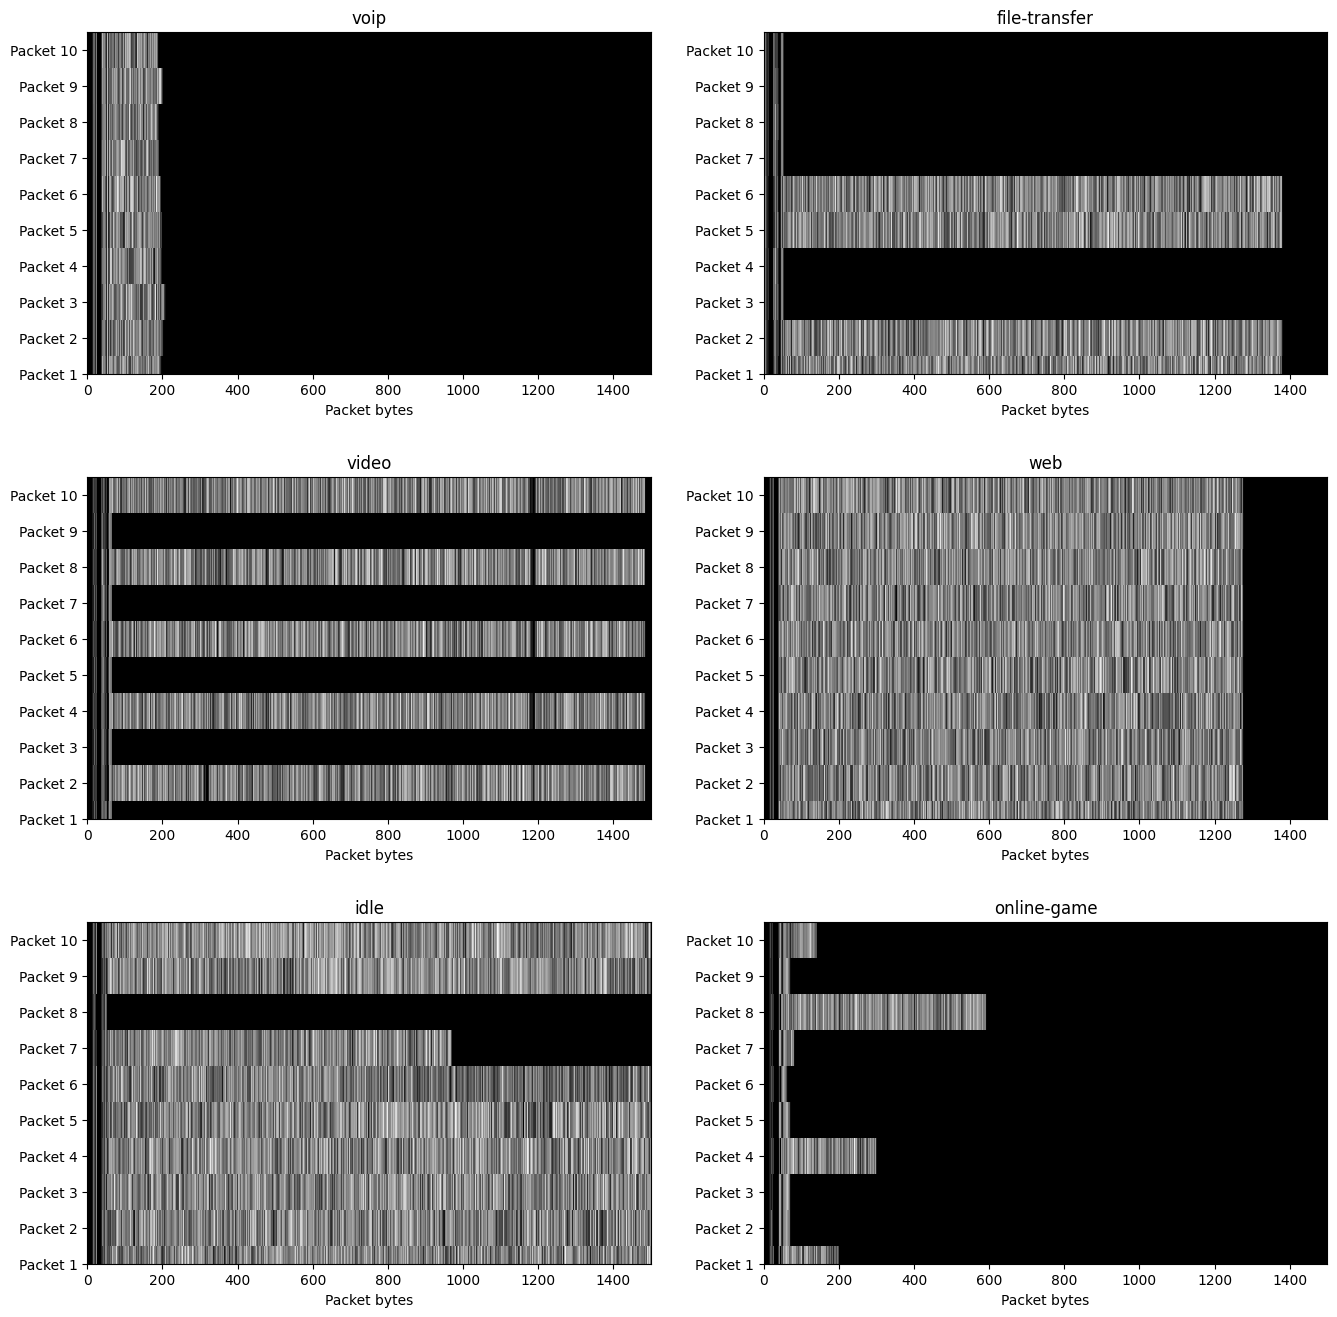

In [11]:
rows = 2
cols = 3
fig, ax = plt.subplots(cols, rows, figsize=(16,16))
plt.subplots_adjust(hspace=0.3)
unique_labels = []
i = 0
while i < rows:
    j = 0
    while j < cols:
        graph = next(iter(packet_list_dataset))
        if graph.x.nonzero().size(0) > 1000:
            label = graph.y.item()
            if label not in unique_labels:
                unique_labels.append(label)
                label_name = get_labels()[label]
                print(label_name)

                bw_values = (graph.x.numpy() * 255).astype(int)
                for k in range(bw_values.shape[0]):
                    vector = bw_values[k, :]
                    
                    # Create a colored strip for each vector
                    color_strip = np.zeros((1, bw_values.shape[1], 3), dtype=np.uint8)
                    color_strip[:, :, 0] = vector
                    color_strip[:, :, 1] = vector
                    color_strip[:, :, 2] = vector
                    
                    # Display the colored strip
                    ax[j][i].imshow(color_strip, extent=[0, bw_values.shape[1], k, k + 1], aspect='auto')

                # Set y-axis ticks and labels
                ax[j][i].set_yticks(np.arange(0.5, bw_values.shape[0], 1))
                ax[j][i].set_yticklabels([f"Packet {i+1}" for i in range(bw_values.shape[0])])

                # Set x-axis label
                ax[j][i].set_xlabel('Packet bytes')
                ax[j][i].set_title(label_name)
                j += 1
    i += 1


# Show the plot
plt.show()
